In [1]:
import sqlite3

# Create the SQLite database
db_path = "sales_data.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sales_data = [
    ("Laptop", 4, 800),
    ("Phone", 10, 500),
    ("Tablet", 6, 300),
    ("Headphones", 15, 50),
    ("Monitor", 3, 200)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

conn.commit()
conn.close()

# Create the analysis script
script_content = """\
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)
conn.close()

print("Sales Summary:")
print(df)

plt.figure(figsize=(8,5))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
"""
with open("task7_sales_summary.py", "w") as f:
    f.write(script_content)

print("✅ Files created: sales_data.db & task7_sales_summary.py")


✅ Files created: sales_data.db & task7_sales_summary.py


Sales Summary:
      product  total_qty  revenue
0  Headphones         15    750.0
1      Laptop          4   3200.0
2     Monitor          3    600.0
3       Phone         10   5000.0
4      Tablet          6   1800.0


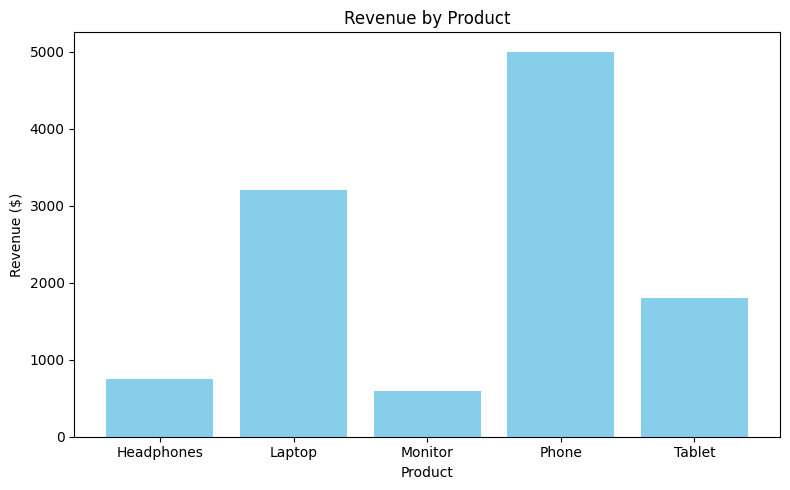

In [3]:
%run task7_sales_summary.py